# CAN WE OMIT SOME CONTROLS?
---

## GENERACIÓN DE GRÁFICA
---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Definimos el grafo dirigido
G = nx.DiGraph()
edges = [
    ("Z1", "X"),
    ("Z1", "Y"),
    ("Z2", "X"),
    ("Z2", "Y"),
    ("Z3", "Z2"),
    ("Z3", "Y"),
    ("X", "Y")
]
G.add_edges_from(edges)

# Posiciones para que se vea claro
pos = {
    "Z1": (-1, 1),
    "Z2": (1, 1),
    "Z3": (0, 2),
    "X": (0, 0),
    "Y": (0, -1)
}



### GRÁFICA
---

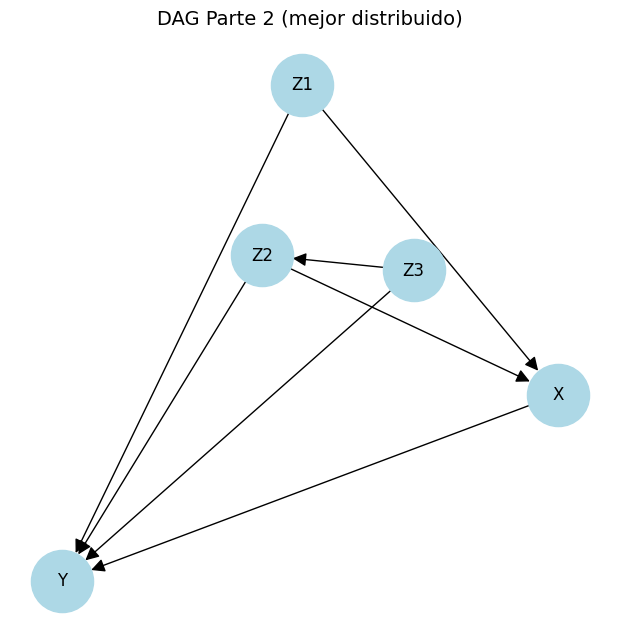

In [2]:
# Layout automático para que se vea más claro
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(6,6))
nx.draw(G, pos, with_labels=True, node_size=2000,
        node_color="lightblue", arrowsize=20, font_size=12)
plt.title("DAG Parte 2 (mejor distribuido)", fontsize=14)
plt.show()


## GENERACIÓN DE DATOS
---

In [3]:
import numpy as np
import pandas as pd

# Semilla para reproducibilidad
np.random.seed(123)

# Número de observaciones
n = 1_000_000

# Simulación del DAG
Z1 = np.random.normal(0, 1, n)
Z3 = np.random.normal(0, 1, n)
Z2 = Z3 + np.random.normal(0, 1, n)
X  = Z1 + Z2 + np.random.normal(0, 1, n)
Y  = 1*X + Z1 + Z2 + Z3 + np.random.normal(0, 1, n)

# DataFrame con los datos
datos = pd.DataFrame({"Z1": Z1, "Z2": Z2, "Z3": Z3, "X": X, "Y": Y})
print(datos.head())

         Z1        Z2        Z3         X         Y
0 -1.085631  1.661348  1.736863  0.690436  1.070334
1  0.997345 -0.357622 -0.651201  0.875850  0.435532
2  0.282978 -0.040390  0.264051 -0.254055  2.122526
3 -1.506295  1.965557  0.037890  0.093550  0.017444
4 -0.578600 -0.268867 -0.038096 -1.285819 -3.244639


C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_29340\2596934208.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import statsmodels.api as sms
# creamos una muestra 
sample = np.random.uniform(0, 1, (1_000_000, 1)) < 0.001
sample.sum()
sample_indices = np.where(sample)[0] # seleccionamos aquellos que tengan cero


## REGRESIONES
---

#### Y VS X
---

In [5]:
print(sms.OLS(Y[sample_indices], X[sample_indices]).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              5179.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:39   Log-Likelihood:                         -2049.2
No. Observations:                1029   AIC:                                      4100.
Df Residuals:                    1028   BIC:                                      4105.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Y VS X,Z1
---

In [6]:
modelo = sms.OLS(datos.loc[sample_indices, "Y"],(datos.loc[sample_indices, ["X", "Z1"]])).fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              2588.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:40   Log-Likelihood:                         -2049.1
No. Observations:                1029   AIC:                                      4102.
Df Residuals:                    1027   BIC:                                      4112.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Y VS X,Z2
---

In [7]:
modelo = sms.OLS(datos.loc[sample_indices, "Y"],(datos.loc[sample_indices, ["X", "Z2"]])).fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              4217.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:40   Log-Likelihood:                         -1831.8
No. Observations:                1029   AIC:                                      3668.
Df Residuals:                    1027   BIC:                                      3678.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Y VS X,Z1,Z2
---

In [8]:
modelo = sms.OLS(datos.loc[sample_indices, "Y"],(datos.loc[sample_indices, ["X", "Z1","Z2"]])).fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              4077.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:40   Log-Likelihood:                         -1657.8
No. Observations:                1029   AIC:                                      3322.
Df Residuals:                    1026   BIC:                                      3337.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Y VS X,Z1,Z2,Z3
---

In [9]:
modelo = sms.OLS(datos.loc[sample_indices, "Y"],(datos.loc[sample_indices, ["X", "Z1","Z2","Z3"]])).fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              4970.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:03:40   Log-Likelihood:                         -1422.9
No. Observations:                1029   AIC:                                      2854.
Df Residuals:                    1025   BIC:                                      2874.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
import statsmodels.api as sm

# Definir fórmulas de regresión
regresiones = {
    "Y ~ X": ["X"],
    "Y ~ X + Z1": ["X", "Z1"],
    "Y ~ X + Z2": ["X", "Z2"],
    "Y ~ X + Z1 + Z2": ["X", "Z1", "Z2"],
    "Y ~ X + Z1 + Z2 + Z3": ["X", "Z1", "Z2", "Z3"]
}

resultados = {}

for nombre, vars_ in regresiones.items():
    X_reg = datos[vars_]
    modelo = sm.OLS(datos["Y"], X_reg).fit()
    resultados[nombre] = modelo


In [11]:
import pandas as pd

estimaciones = []

for nombre, modelo in resultados.items():
    coef = modelo.params["X"]
    ci_low, ci_high = modelo.conf_int(alpha=0.01).loc["X"]  # 99% CI
    estimaciones.append([nombre, coef, ci_low, ci_high])

df_plot = pd.DataFrame(estimaciones, columns=["Modelo", "Coef_X", "CI_low", "CI_high"])
print(df_plot)


                 Modelo    Coef_X    CI_low   CI_high
0                 Y ~ X  2.000795  1.998567  2.003023
1            Y ~ X + Z1  2.001036  1.998463  2.003610
2            Y ~ X + Z2  1.500968  1.498395  1.503540
3       Y ~ X + Z1 + Z2  1.001504  0.998351  1.004657
4  Y ~ X + Z1 + Z2 + Z3  1.001356  0.998780  1.003931


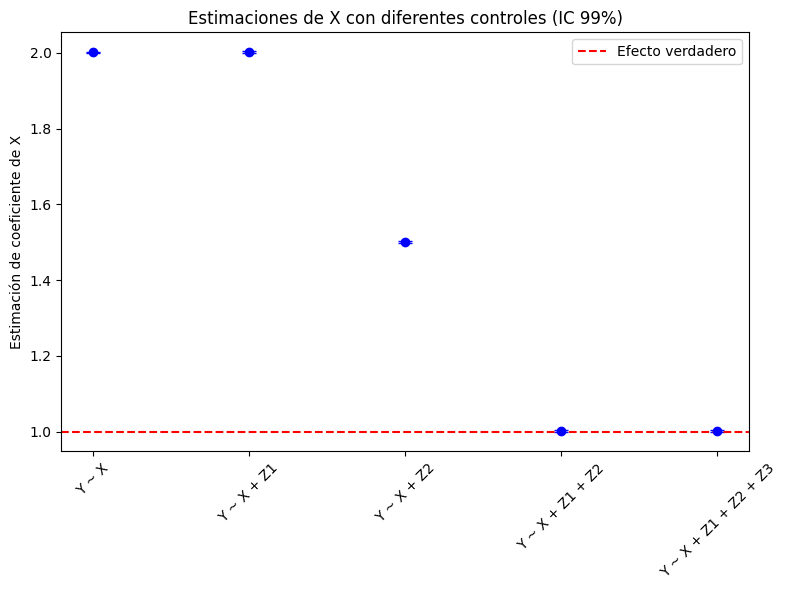

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Gráfico de barras con intervalos
plt.errorbar(df_plot["Modelo"], df_plot["Coef_X"],
             yerr=[df_plot["Coef_X"]-df_plot["CI_low"], df_plot["CI_high"]-df_plot["Coef_X"]],
             fmt="o", capsize=5, color="blue")

plt.axhline(y=1, color="red", linestyle="--", label="Efecto verdadero")
plt.xticks(rotation=45)
plt.ylabel("Estimación de coeficiente de X")
plt.title("Estimaciones de X con diferentes controles (IC 99%)")
plt.legend()
plt.tight_layout()
plt.show()
# los intervalos son tan estrehos que no se llegan a percibir en la g´rafica pero si estan 


## 📊 Results Interpretation

### **1 Which regressions seem to estimate the effect correctly?**

Observing the figure, we see that:

- The regressions **Y ~ X**, **Y ~ X + Z1**, and **Y ~ X + Z2** overestimate the true effect (values around 1.5–2.0).  
- The regressions **(4) Y ~ X + Z1 + Z2** and **(5) Y ~ X + Z1 + Z2 + Z3** produce estimates very close to the true value (1).

The regressions **(4)** and **(5)** seem to estimate the effect correctly, since their coefficients for \( X \) are close to the true value of 1 and include it within their 99% confidence intervals.

---

### **2 Summary table for regressions (4) and (5)**

```python
print(resultados["Y ~ X + Z1 + Z2"].summary())
print(resultados["Y ~ X + Z1 + Z2 + Z3"].summary())


In [15]:
print(resultados["Y ~ X + Z1 + Z2"].summary())
print(resultados["Y ~ X + Z1 + Z2 + Z3"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          3.900e+06
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                        0.00
Time:                        22:15:33   Log-Likelihood:                     -1.6213e+06
No. Observations:             1000000   AIC:                                  3.243e+06
Df Residuals:                  999997   BIC:                                  3.243e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------



Below are the results for regressions (4) and (5):

| Model | Coef. X | Std. Error | t-stat | Adj. R² | 95% CI (X) |
|:--------|:--------:|:-----------:|:-------:|:-------------:|:-------------:|
| (4) Y ~ X + Z1 + Z2 | 1.0015 | 0.001 | 818.15 | 0.921 | [0.999, 1.004] |
| (5) Y ~ X + Z1 + Z2 + Z3 | 1.0014 | 0.001 | 1001.51 | 0.947 | [0.999, 1.003] |

---

### **Interpretation**

- In both models, the estimated coefficient of \( X \) is **very close to the true value (1)**, indicating that the regressions correctly capture the causal effect.  
- The **standard errors are extremely small** (around 0.001), implying **high precision** in the estimates.  
- The **95% confidence intervals** contain the true value (1.0), confirming there is no significant bias.  
- The **adjusted R²** slightly increases when \( Z3 \) is included (from 0.921 to 0.947), meaning the model explains a bit more of the variation in \( Y \), though the improvement is minor.

---

### **Final comment**
 Both models yield **unbiased and precise estimates** of the effect of \( X \).  
The difference between (4) and (5) is minimal, so including \( Z3 \) barely improves precision or changes the coefficient.  
This suggests that \( Z3 \) is **not an important confounder**, while \( Z1 \) and \( Z2 \) are relevant controls that help remove bias when omitted.
